<a href="https://colab.research.google.com/github/VictorPM99/Data/blob/main/ROC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Victor Patricio Manaia RA:225199**

In [328]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [347]:
#Podemos importar via numpy ou via pandas
# Carregando dados
dados = np.loadtxt('https://github.com/VictorPM99/Data/raw/main/x13.csv', delimiter=';')
# Print dos dados
dados

array([[ 6.11e+18,  9.14e+18,  1.00e+18],
       [ 4.31e+18,  4.80e+18,  1.00e+18],
       [ 1.44e+18,  1.09e+19, -1.00e+18],
       ...,
       [ 4.11e+18,  3.22e+18,  1.00e+18],
       [ 6.49e+18,  2.85e+18,  1.00e+18],
       [ 7.58e+18,  9.50e+18,  1.00e+18]])

[[ 8.04209151e-38  5.85425300e-19 -2.93494548e-19]]
PARA DELTA = 0 


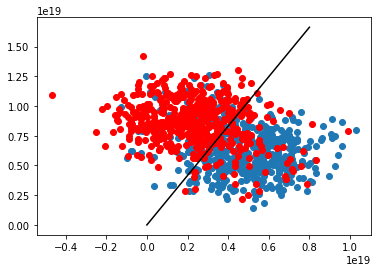

PARA DELTA = 0.3 


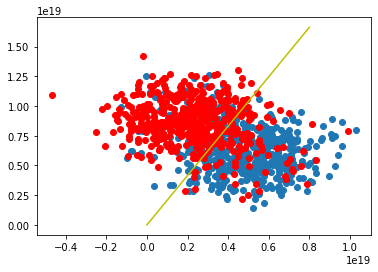

PARA DELTA = -0.2


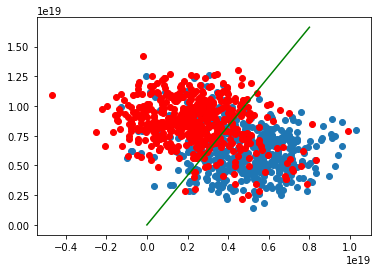

In [348]:
# Separar os objetos dos atributos e das classes
X= dados[0:,:2]
y=dados[0:,2]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
classifier = LogisticRegression(solver='liblinear').fit(X_train,y_train)
predict = classifier.predict(X_test)
wls = np.zeros((1,3))
wls[0,0] = classifier.intercept_
wls[0,1] = classifier.coef_[0,0]
wls[0,2] = classifier.coef_[0,1]
print(WLS)
#Para delta = 0
xn0 = 0
xn1 = 0.8*10**19
yn0 = wls[0,0]/wls[0,2]
yn1 = wls[0,0]/wls[0,2] - x1*wls[0,1]/wls[0,2]
xd0 = [xn0,xn1]
yd0 = [yn0,yn1]
#Para delta = 0.3
xm0 = 0
xm1 = 0.8*10**19
ym0 = wls[0,0]/wls[0,2]
ym1 = 0.3 - (wls[0,0]/wls[0,2]) - x1*wls[0,1]/wls[0,2]
xd3 = [xm0,xm1]
yd3 = [ym0,ym1]
#Para delta = 0.3
xo0 = 0
xo1 = 0.8*10**19
yo0 = wls[0,0]/wls[0,2]
yo1 = -0.2 - (wls[0,0]/wls[0,2]) - x1*wls[0,1]/wls[0,2]
xd2 = [xo0,xo1]
yd2 = [yo0,yo1]

#DELTA = 0
fig = plt.figure()
fig = fig.add_subplot()
classe1=np.where(dados[:,2] == 1.00e+18)
a= fig.scatter(dados[classe1,0].tolist(),dados[classe1,1].tolist())
classe2=np.where(dados[:,2] == -1.00e+18)
b =fig.scatter(dados[classe2,0].tolist(),dados[classe2,1].tolist(),c='r')
print('PARA DELTA = 0 ')
fig.plot(xd0,yd0, c='black')
plt.show()
#DELTA = 0.3
fig = plt.figure()
fig = fig.add_subplot()
classe1=np.where(dados[:,2] == 1.00e+18)
a= fig.scatter(dados[classe1,0].tolist(),dados[classe1,1].tolist())
classe2=np.where(dados[:,2] == -1.00e+18)
b =fig.scatter(dados[classe2,0].tolist(),dados[classe2,1].tolist(),c='r')
print('PARA DELTA = 0.3 ')
fig.plot(xd3,yd3, c='y')
plt.show()
#DELTA = -0.2
fig = plt.figure()
fig = fig.add_subplot()
classe1=np.where(dados[:,2] == 1.00e+18)
a= fig.scatter(dados[classe1,0].tolist(),dados[classe1,1].tolist())
classe2=np.where(dados[:,2] == -1.00e+18)
b =fig.scatter(dados[classe2,0].tolist(),dados[classe2,1].tolist(),c='r')
print('PARA DELTA = -0.2')
fig.plot(xd2,yd2, c='green')
plt.show()

In [344]:
#Mudando de numpy para dataframe
df1 = pd.DataFrame({'dada':dados[0:,0],'dadb':dados[0:,1]})
df2 = pd.DataFrame({'rot':dados[0:,2]})
df2=df2.replace((-1.000000e+18,1.000000e+18),(-1,1))
df1_train, df1_test, df2_train, df2_test = train_test_split(df1,df2, test_size=0.9)
logreg = LogisticRegression()
logreg.fit(df1_train,df2_train)
df2_pred = logreg.predict(df1_test)
from sklearn import metrics
print(metrics.accuracy_score(df2_test,df2_pred))
# Examinando a distribuição das classes do conjunto de teste (Utilizando um método do pandas)
print(df2_test.value_counts())
# Calculando a acurácia nula
#print((206)/(206+194))
print(df2_test.values[:15])
print(df2_pred[:15])
# Importante: primeiro argumento é valor verdadeiro, segundo argumento é valor predito
print(metrics.confusion_matrix(df2_test, df2_pred))

0.7911111111111111
rot 
 1.0    459
-1.0    441
dtype: int64
[[ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]]
[ 1. -1.  1.  1. -1. -1. -1. -1. -1. -1.  1. -1. -1.  1.  1.]
[[385  56]
 [132 327]]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [345]:

# Salvando a matriz de confusão e fatiando em 4 pedaços
confusion = metrics.confusion_matrix(df2_test, df2_pred)
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

#Calculando a acurácia de classificação
print((TP+TN)/(TP+TN+FP+FN))
print(metrics.accuracy_score(df2_test, df2_pred))
#Calculando a sensibilidade 
print(TP/(TP+FN))
print(metrics.recall_score(df2_test, df2_pred))
# Calculando a especificidade
print(TN/(TN+FP))

0.7911111111111111
0.7911111111111111
0.7124183006535948
0.7124183006535948
0.873015873015873


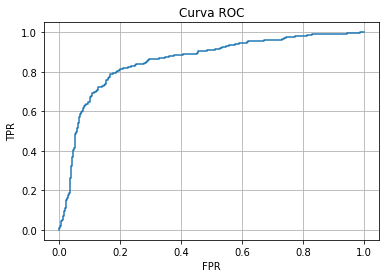

In [346]:
# Armazenando as probabilidades de predição para a classe 1 
df2_pred_proba = logreg.predict_proba(df1_test)[0:,1]
# IMPORTANTE: o primeiro argumento são os valores verdadeiros, segundo argumento são as probabilidades de predição
fpr, tpr, thresholds = metrics.roc_curve(df2_test, df2_pred_proba)
plt.plot(fpr, tpr)
plt.title('Curva ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid(True)
plt.show()